In [22]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


## 1. Carga del archivo y visualización de las columnas del dataset

In [15]:
df = pd.read_csv('PFDA_People_analytics.csv', sep = ';')
df.head()

,Unnamed: 0,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,...,1.0,80,0,8,0,1,6,4,0,5
1,1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,...,4.0,80,1,10,3,3,10,7,1,7
2,2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,...,2.0,80,0,7,3,3,0,0,0,0
3,3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,...,3.0,80,0,8,3,3,8,7,3,0
4,4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,...,4.0,80,1,6,3,3,2,2,2,2


## 2. Revisión de datos duplicados

In [21]:
df.duplicated().sum()

np.int64(0)

In [16]:
df.isna().sum()

Unnamed: 0                   0
Age                          0
Attrition                    0
BusinessTravel               0
DailyRate                    0
Department                   0
DistanceFromHome             0
Education                    0
EducationField               0
EmployeeCount                0
EmployeeNumber               0
EnvironmentSatisfaction      0
Gender                       0
HourlyRate                   0
JobInvolvement               0
JobLevel                     0
JobRole                      0
JobSatisfaction              0
MaritalStatus                0
MonthlyIncome                0
MonthlyRate                  0
NumCompaniesWorked           0
Over18                       0
OverTime                    30
PercentSalaryHike            0
PerformanceRating            0
RelationshipSatisfaction    30
StandardHours                0
StockOptionLevel             0
TotalWorkingYears            0
TrainingTimesLastYear        0
WorkLifeBalance              0
YearsAtC

## 3. Verficación de tipos de datos

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 36 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                1470 non-null   int64  
 1   Age                       1470 non-null   int64  
 2   Attrition                 1470 non-null   object 
 3   BusinessTravel            1470 non-null   object 
 4   DailyRate                 1470 non-null   int64  
 5   Department                1470 non-null   object 
 6   DistanceFromHome          1470 non-null   int64  
 7   Education                 1470 non-null   int64  
 8   EducationField            1470 non-null   object 
 9   EmployeeCount             1470 non-null   int64  
 10  EmployeeNumber            1470 non-null   int64  
 11  EnvironmentSatisfaction   1470 non-null   int64  
 12  Gender                    1470 non-null   object 
 13  HourlyRate                1470 non-null   int64  
 14  JobInvol

## 4. Se hizo revisión de los datos y no se encontraron datos duplicados, valores faltantes o nulos que puedan afectar a análisis posteriores


## 5. Exploración de los datos mediante gráficos

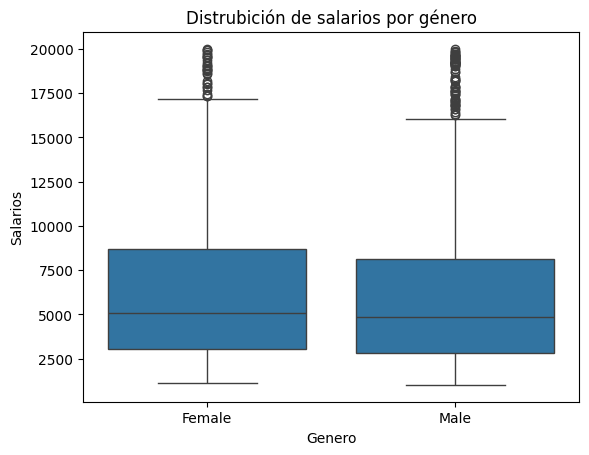

In [23]:
sns.boxplot(data=df, x='Gender', y='MonthlyIncome')
plt.title('Distrubición de salarios por género')
plt.xlabel('Genero')
plt.ylabel('Salarios')
plt.show()

In [24]:
outlier_info = []

for col in df.select_dtypes(include=np.number).columns:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr
    mask = (df[col] < lower) | (df[col] > upper)
    outlier_info.append({
        "columna": col,
        "outliers": mask.sum(),
        "porcentaje": round(mask.mean()*100, 2)
    })

outlier_df = pd.DataFrame(outlier_info)
outlier_df

,columna,outliers,porcentaje
0,Unnamed: 0,0,0.00
1,Age,0,0.00
2,DailyRate,0,0.00
3,DistanceFromHome,0,0.00
4,Education,0,0.00
5,EmployeeCount,0,0.00
6,EmployeeNumber,0,0.00
7,EnvironmentSatisfaction,0,0.00
8,HourlyRate,0,0.00
9,JobInvolvement,0,0.00


In [25]:
df[(df['MonthlyIncome'] > 15000) & (df['MonthlyIncome'].apply(str).str.contains("", regex=False, na=False, case=False))]

,Unnamed: 0,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
18,18,53,No,Travel_Rarely,1219,Sales,2,4,Life Sciences,1,...,3.0,80,0,31,3,3,25,8,3,7
25,25,53,No,Travel_Rarely,1282,Research & Development,5,3,Other,1,...,4.0,80,1,26,3,2,14,13,4,8
29,29,46,No,Travel_Rarely,705,Sales,2,4,Marketing,1,...,4.0,80,0,22,2,2,2,2,2,1
45,45,41,Yes,Travel_Rarely,1360,Research & Development,12,3,Technical Degree,1,...,4.0,80,0,23,0,3,22,15,15,8
62,62,50,No,Travel_Rarely,989,Research & Development,7,2,Medical,1,...,4.0,80,1,29,2,2,27,3,13,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1374,1374,58,No,Travel_Rarely,605,Sales,21,3,Life Sciences,1,...,3.0,80,1,29,2,2,1,0,0,0
1377,1377,49,No,Travel_Frequently,1064,Research & Development,2,1,Life Sciences,1,...,4.0,80,0,28,3,3,5,4,4,3
1401,1401,55,No,Travel_Rarely,189,Human Resources,26,4,Human Resources,1,...,1.0,80,1,35,0,3,10,9,1,4
1437,1437,39,No,Non-Travel,105,Research & Development,9,3,Life Sciences,1,...,3.0,80,0,21,3,2,6,0,1,3


## Mediante el análisis del boxplot se hizo un análisis general en donde pudimos identificar la presencia de outliers con respecto al ingreso de los trabajadores, demostrando que las variables que afectan son el rol que ocupa el trabajador en la empresa, siendo los cargos de Manager y Research Director los que más ganan y en análisis posteriores lo recomendable sería que estos sean analizados por separado.

In [28]:
df.groupby(['Department']).agg(JobSatisfaction_count=('JobSatisfaction', 'mean')).reset_index().round(2)

,Department,JobSatisfaction_count
0,Human Resources,2.60
1,Research & Development,2.73
2,Sales,2.75


C:\Users\Admin\AppData\Local\Temp\ipykernel_16296\78869558.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='Department', y='JobSatisfaction', estimator='mean', ci=None)


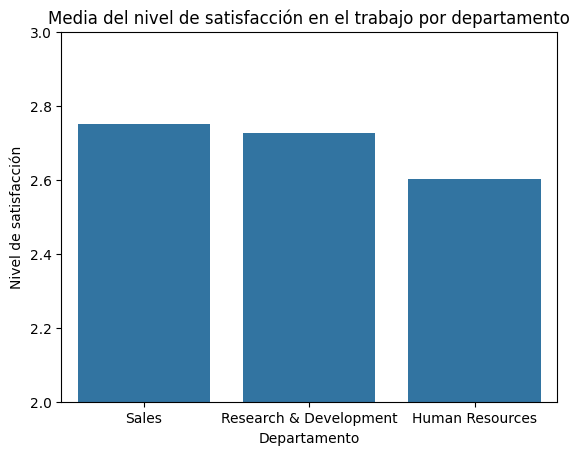

In [30]:
sns.barplot(data=df, x='Department', y='JobSatisfaction', estimator='mean', ci=None)
plt.title('Media del nivel de satisfacción en el trabajo por departamento')
plt.xlabel('Departamento')
plt.ylabel('Nivel de satisfacción')
plt.ylim(2, 3)   # 🔹 Establece el rango del eje Y de 2 a 3
plt.show()


## Explorando el nivel de satisfacción general de cada departamento, en ningun caso supera la calificación de 3, se puede deducir que de manera general los empleados se encuentran satisfechos en su rol en el trabajo, pero para posteriores análisis seria recomendable estudiar el comportamiento del nivel de satisfacción segun el rol que ocupan en la empresa

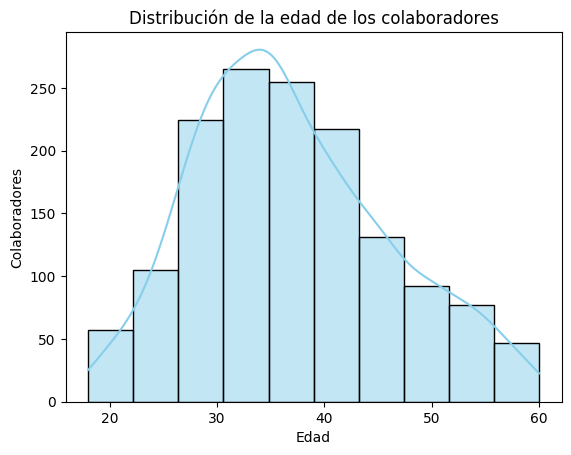

In [33]:

sns.histplot(data=df, x='Age', bins=10, kde=True, color='skyblue')
plt.title('Distribución de la edad de los colaboradores')
plt.xlabel('Edad')
plt.ylabel('Colaboradores')
plt.show()


## Explorando el rango de edad de los colaboradores de la empresa pudimos observar que la  media de edad de los trabajadores se encuentra entre los 30 a 40 años, además que mediante esto se identificó que la distrubución se encuentra sesgada hacia la izquierda lo que nos da a entender que los colaboradores que se encuentran trabajando en su mayoría son jóvenes. 

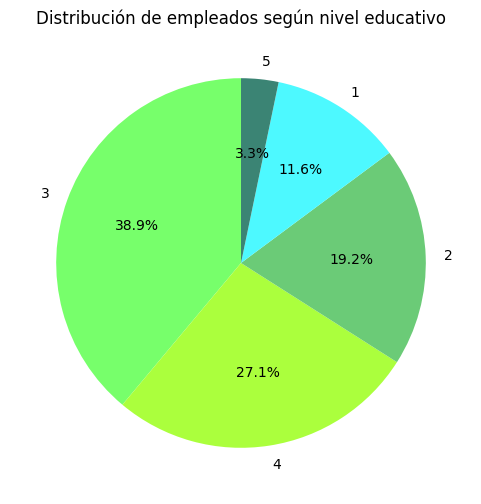

In [46]:
colors = ["#77FF6B", "#ABFF3D", "#6BCB77", "#4DF9FF", "#3B8474"]

plt.figure(figsize=(6,6))
plt.pie(edu_counts,
        labels=edu_counts.index,
        autopct='%1.1f%%',
        startangle=90,
        colors=colors)
plt.title("Distribución de empleados según nivel educativo")
plt.show()

## Mediante el gráfico de pastel pudimos identificar que la mayor parte de los colaboradores tienen un nivel educativo de 3 y 4, donde deducimos que 3 es para los colaboradores que un título universitario y 4 para colaboradores con posgrado, de esta manera podemos decir que la empresa cuenta con un personal altamentamente calificado. 

# Propuestas de análisis
## 1. Dinámicas laborales y rotación del personal
Identificar los principales impulsores de la rotación y formular estrategias de retención del talento basadas en datos.
¿Qué características personales, laborales y de satisfacción explican la probabilidad de que un empleado abandone la empresa?
Mediante esto se busca modelar el riesgo de rotación laboral, integrando variables de distintas dimensiones (personales, estructurales y actitudinales).
Se pueden identificar patrones de desgaste laboral (como poca satisfacción en el rol que ocupan en la empresa, bajo ingreso o escasa promoción) y segmentos vulnerables (por edad, nivel jerárquico o distancia al trabajo).

## 2. Carrera profesional, bienestar y equidad interna
¿Cómo se relacionan la experiencia, el crecimiento profesional y las condiciones laborales con la satisfacción y el bienestar de los empleados, considerando diferencias por género y nivel jerárquico?
Mediante esto se busca explorar el desarrollo de carrera dentro de la organización y cómo se relaciona con el bienestar y la satisfacción.
Busca detectar si existen desequilibrios (por ejemplo, brechas de género en promoción o ingreso, o disminución de satisfacción con los años de antigüedad).